In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load training and test datasets
train_data = pd.read_csv("amazon_review_polarity_csv/train.csv", encoding="latin-1", header=None, names=['label', 'title', 'text'])
test_data = pd.read_csv("amazon_review_polarity_csv/test.csv", encoding="latin-1", header=None, names=['label', 'title', 'text'])


In [3]:
# The dataset has class labels 1 for negative and 2 for positive
# Convert labels to 0 (negative) and 1 (positive)
train_data['label'] = train_data['label'].map({1: 0, 2: 1})
test_data['label'] = test_data['label'].map({1: 0, 2: 1})

In [4]:
# Split features and labels
X_train, y_train = train_data['text'], train_data['label']
X_test, y_test = test_data['text'], test_data['label']

In [5]:
# Step 1: Vectorize the text using TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [6]:
# Step 2: Train the Multinomial Naive Bayes model
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [7]:
# Step 3: Make predictions
y_pred = clf.predict(X_test_tfidf)

In [8]:
# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.81      0.83      0.82    200000
           1       0.83      0.81      0.82    200000

    accuracy                           0.82    400000
   macro avg       0.82      0.82      0.82    400000
weighted avg       0.82      0.82      0.82    400000



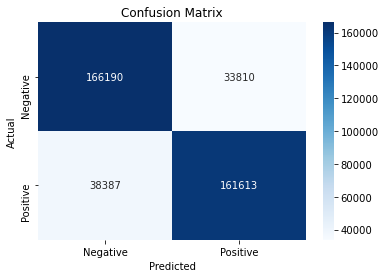

In [9]:
# Step 5: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()